In [10]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [12]:
# Step 1: Load the dataset
def load_emails(folder_path, label):
    emails = []
    labels = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='latin-1') as file:
            emails.append(file.read())
            labels.append(label)
    return emails, labels


In [14]:
# Load spam and ham emails
spam_emails, spam_labels = load_emails("spamassassin-public-corpus/spam", label=0)
ham_emails, ham_labels = load_emails("spamassassin-public-corpus/ham", label=1)

In [16]:
# Step 3: Create lists for email contents and labels
email_contents = spam_emails + ham_emails
email_labels = spam_labels + ham_labels

In [18]:
# Step 4: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(email_contents, email_labels, test_size=0.2, random_state=42)

In [20]:
# Step 5: Instantiate and train DecisionTreeClassifier with HashingVectorizer and TfidfTransformer
pipeline = make_pipeline(
    HashingVectorizer(n_features=2**10, alternate_sign=False),
    TfidfTransformer(),
    DecisionTreeClassifier(random_state=42)
)

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('hashingvectorizer',
                 HashingVectorizer(alternate_sign=False, n_features=1024)),
                ('tfidftransformer', TfidfTransformer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [24]:
# Step 6: Evaluate model performance
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [26]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.96
Confusion Matrix:
[[288  16]
 [ 15 521]]


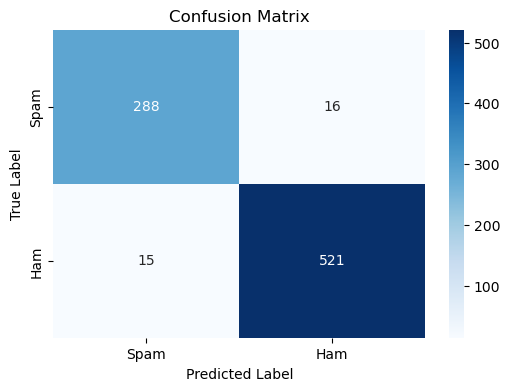

In [28]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

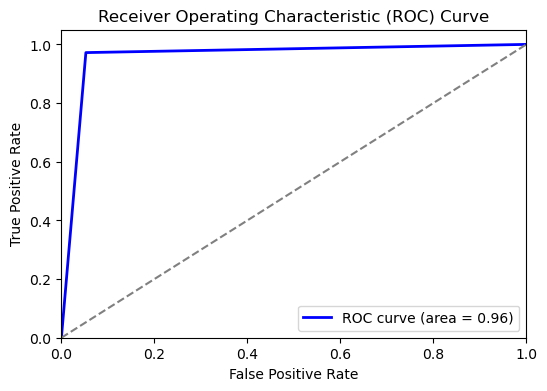

In [30]:
# Plot ROC curve
y_scores = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

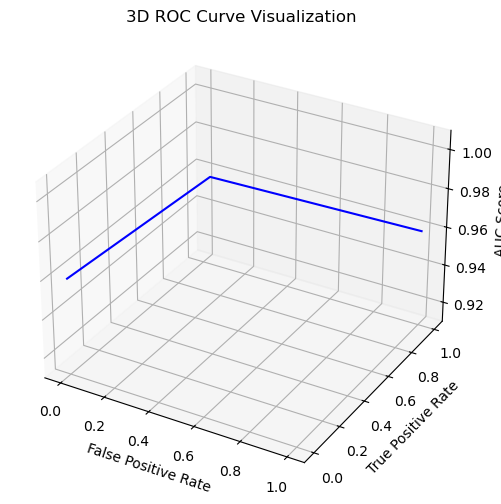

In [32]:
# 3D Plot of ROC Curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(fpr, tpr, zs=roc_auc, zdir='z', label='ROC Curve', color='blue')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('AUC Score')
ax.set_title('3D ROC Curve Visualization')
plt.show()

In [36]:
# THANKS YOU..